[View in Colaboratory](https://colab.research.google.com/github/sl2820/Deep_Learning_Study/blob/master/Fashion_MNIST_Practice_keras.ipynb)

# Fashion MNIST 
Using Fashion MNIST dataset to implement CNN

### Data Labels
0: T-Shirts/Tops

1: Pants

2: Pullovers

3: Dress

4: Coat

5: Sandals

6: Shirts

7: Sneakers

8: Backpacks

9: Ankle Boots


## Import the Fashion MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras


Using TensorFlow backend.


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
Label (Y) is Sandal and its index is 5.


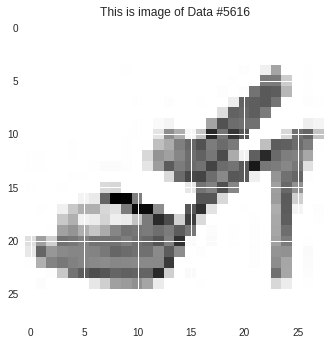

In [2]:
# Load Data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
#Show the data
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
# Visualize your Data
img_index = np.random.randint(len(x_train)+1)
label_index = y_train[img_index]
print ("Label (Y) is %s and its index is %d." %(fashion_mnist_labels[label_index], label_index))
plt.title("This is image of Data #%s" % img_index)
plt.imshow(x_train[img_index])

### Data Normalization

In [0]:
# Create them to have similar sizes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Split Train data into subdata sets
Using 60,000 Training sets, divide into following subsets:

Train / Validation / Test datasets

In [4]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Model

### Create Model Architecture

In [5]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# Param = output_channels * (input_channels * kernal_size + 1) = 64 * (1*(2*2)+1) = 320
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# Param = output_channels * (input_channels * kernal_size + 1) = 32 * (64 *(2*2) + 1) = 8224
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# Param = output_channels * (input_channels * kernal_size + 1) = 32 * (64 *(2*2) + 1) = 8224
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Param = output_size * (input_size + 1) = 1568*256 + 256
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Param = output_size * (input_size + 1) = 256*10 + 10

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

### Compile the model

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print("Compile Completed")

Compile Completed


### Train the Model

In [7]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.6178 - acc: 0.7721
Epoch 00001: val_loss improved from inf to 0.37623, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 13s 234us/step - loss: 0.6175 - acc: 0.7722 - val_loss: 0.3762 - val_acc: 0.8672
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4250 - acc: 0.8453
Epoch 00002: val_loss improved from 0.37623 to 0.33150, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 11s 203us/step - loss: 0.4249 - acc: 0.8453 - val_loss: 0.3315 - val_acc: 0.8832
Epoch 3/10
54784/55000 [============================>.] - ETA: 0s - loss: 0.3765 - acc: 0.8631
Epoch 00003: val_loss improved from 0.33150 to 0.30502, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 11s 196us/step - loss: 0.3767 - acc: 0.8630 - val_loss: 0.3050 - val_acc: 0.890

### Load Model with the best validation accuracy

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### Test Accuracy

In [9]:
#Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9078


### Visualize Prediction

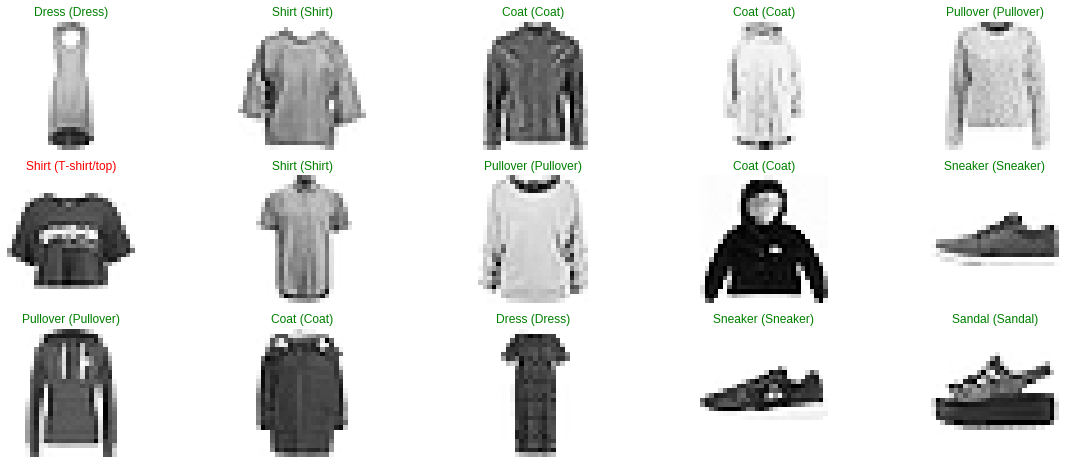

In [12]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))